# Starsim learning day - Demographics

This notebook provides an introduction to setting up demographics within Starsim. It is intended to be read in conjunction with the learning day presentation slides available at: https://docs.google.com/presentation/d/1HFIsrw00s8XA7lscY0FeZC3idZs9ABxcohlz_JDmaew. 

Some of these exercises are based closely on the Starsim tutorial on demographics, available at: https://docs.idmod.org/projects/starsim/en/latest/tutorials/tut_demographics.html.

## How does Starsim handle demographics?
If you create a simulation in Starsim, demographics are not included by default. This is because there are lots of applications that don't require it, for instance if you're simulating an outbreak or a short timespan like one season. However, if you're simulating over time horizons longer than a year or two, it might become increasingly important to add information about the demographics changes over time. And even over short time horizons, many diseases disproportionately affect younger or older populations, so you may still like to add some information about the population age structure.

## Starting with the basics: simple birth and death rates
The simplest possible way to add demographics is just to add a birth and death rate directly to the simulation:

In [1]:
import starsim as ss

pars = dict(
    birth_rate=20,
    death_rate=10,
    networks = 'random', # Random network
    diseases = dict(     # The SIR disease model, our focus for this sessoin
       type = 'sir',
       dur_inf = 10,
       beta = 0.1,
   )
)
sim = ss.Sim(pars)
sim.run()

/Users/robynstuart/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Starsim 2.0.0 (2024-10-01) — © 2023-2024 by IDM
Initializing sim with 10000 agents
  Running 2000.0 ( 0/51) (0.00 s)  ———————————————————— 2%
  Running 2010.0 (10/51) (0.29 s)  ••••———————————————— 22%
  Running 2020.0 (20/51) (0.61 s)  ••••••••———————————— 41%
  Running 2030.0 (30/51) (0.87 s)  ••••••••••••———————— 61%
  Running 2040.0 (40/51) (1.16 s)  ••••••••••••••••———— 80%
  Running 2050.0 (50/51) (1.47 s)  •••••••••••••••••••• 100%



Sim(n=10000; 2000—2050; networks=randomnet; demographics=births, deaths; diseases=sir)

Much like with diseases or networks, to do anything more advanced you will almost certainly need to set up your demographics using modules. This is covered in the next section.

## Most common usage: creating demographic modules
Starsim contains three main demographic modules: `ss.Deaths`, `ss.Births` and `ss.Pregnancy`. Let's look at births and deaths first:

Initializing sim with 10000 agents
  Running 2000.0 ( 0/201) (0.00 s)  ———————————————————— 0%
  Running 2010.0 (10/201) (0.05 s)  •——————————————————— 5%
  Running 2020.0 (20/201) (0.11 s)  ••—————————————————— 10%
  Running 2030.0 (30/201) (0.17 s)  •••————————————————— 15%
  Running 2040.0 (40/201) (0.26 s)  ••••———————————————— 20%
  Running 2050.0 (50/201) (0.32 s)  •••••——————————————— 25%
  Running 2060.0 (60/201) (0.36 s)  ••••••—————————————— 30%
  Running 2070.0 (70/201) (0.39 s)  •••••••————————————— 35%
  Running 2080.0 (80/201) (0.49 s)  ••••••••———————————— 40%
  Running 2090.0 (90/201) (0.67 s)  •••••••••——————————— 45%
  Running 2100.0 (100/201) (0.77 s)  ••••••••••—————————— 50%
  Running 2110.0 (110/201) (0.86 s)  •••••••••••————————— 55%
  Running 2120.0 (120/201) (1.00 s)  ••••••••••••———————— 60%
  Running 2130.0 (130/201) (1.10 s)  •••••••••••••——————— 65%
  Running 2140.0 (140/201) (1.18 s)  ••••••••••••••—————— 70%
  Running 2150.0 (150/201) (1.27 s)  ••••••••••

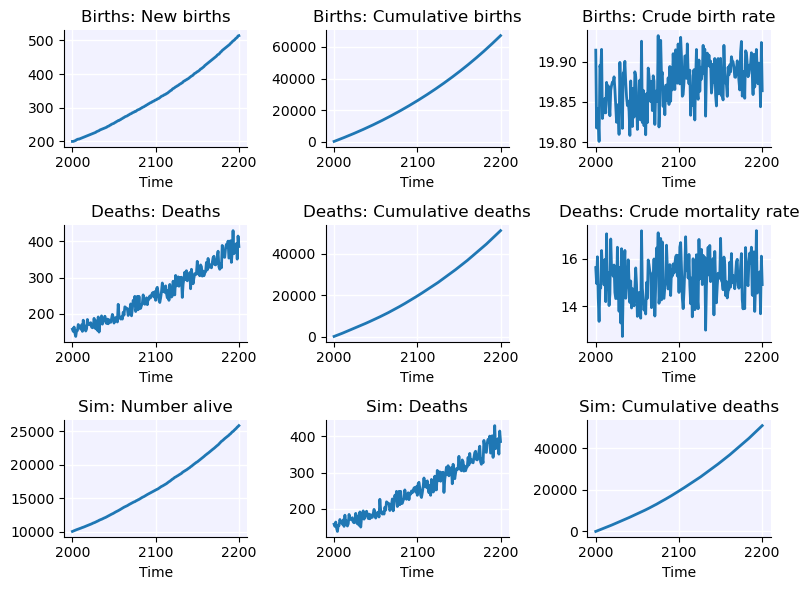

In [4]:
births = ss.Births(birth_rate=20)
deaths = ss.Deaths(death_rate=15)

sim = ss.Sim(n_agents=10e3, demographics=[births, deaths], dur=200, rand_seed=1).run()
sim.plot()

## Using data-informed birth and death rates
Rather than using a constant death rate applied to everyone in the population, you'll get much more realistic demographics if you use mortality rates that vary over time and by age/sex. In the Github repository for today's sessions you can find files called `nigeria_deaths.csv` and `nigeria_births.csv`. Starsim contains support for reading these files in and processing them:

In [6]:
import pandas as pd  # For reading in CSV files
birth_rates = pd.read_csv('nigeria_births.csv')
births = ss.Births(pars={'birth_rate': birth_rates})

death_rates = pd.read_csv('nigeria_deaths.csv')
death = ss.Deaths(pars={'death_rate': death_rates, 'units': 1})

sim = ss.Sim(n_agents=5e3, demographics=[births, deaths], dur=200, rand_seed=1).run()

Initializing sim with 10000 agents
  Running 2000.0 ( 0/201) (0.00 s)  ———————————————————— 0%
  Running 2010.0 (10/201) (0.03 s)  •——————————————————— 5%
  Running 2020.0 (20/201) (0.08 s)  ••—————————————————— 10%
  Running 2030.0 (30/201) (0.13 s)  •••————————————————— 15%
  Running 2040.0 (40/201) (0.25 s)  ••••———————————————— 20%
  Running 2050.0 (50/201) (0.38 s)  •••••——————————————— 25%
  Running 2060.0 (60/201) (0.53 s)  ••••••—————————————— 30%
  Running 2070.0 (70/201) (0.71 s)  •••••••————————————— 35%
  Running 2080.0 (80/201) (0.90 s)  ••••••••———————————— 40%
  Running 2090.0 (90/201) (1.03 s)  •••••••••——————————— 45%
  Running 2100.0 (100/201) (1.25 s)  ••••••••••—————————— 50%
  Running 2110.0 (110/201) (1.46 s)  •••••••••••————————— 55%
  Running 2120.0 (120/201) (2.05 s)  ••••••••••••———————— 60%
  Running 2130.0 (130/201) (2.43 s)  •••••••••••••——————— 65%
  Running 2140.0 (140/201) (3.02 s)  ••••••••••••••—————— 70%
  Running 2150.0 (150/201) (3.59 s)  ••••••••••

## Pregnancy and births
If you add a births module, you will be able to capture population growth since agents will be added to the population over time. However, if you need to model maternal transmission or any other details related to pregnancy itself, you will need to use a `ss.Pregnancy` module instead of `ss.Births`. Rather than a birth rate, this module uses age- and time-specific fertility rates, as captured in the file `nigeria_asfr.csv` in the repository for today.

In [7]:
fertility_rate = pd.read_csv('nigeria_asfr.csv')
pregnancy = ss.Pregnancy(pars={'fertility_rate': fertility_rate})

death_rates = pd.read_csv('nigeria_deaths.csv')
death = ss.Deaths(pars={'death_rate': death_rates, 'units': 1})

sim = ss.Sim(n_agents=5e3, demographics=[pregnancy, deaths], dur=200, rand_seed=1).run()

Initializing sim with 5000 agents
  Running 2000.0 ( 0/201) (0.00 s)  ———————————————————— 0%
  Running 2010.0 (10/201) (0.12 s)  •——————————————————— 5%
  Running 2020.0 (20/201) (0.28 s)  ••—————————————————— 10%
  Running 2030.0 (30/201) (0.42 s)  •••————————————————— 15%
  Running 2040.0 (40/201) (0.51 s)  ••••———————————————— 20%
  Running 2050.0 (50/201) (0.59 s)  •••••——————————————— 25%
  Running 2060.0 (60/201) (0.71 s)  ••••••—————————————— 30%
  Running 2070.0 (70/201) (0.80 s)  •••••••————————————— 35%
  Running 2080.0 (80/201) (0.88 s)  ••••••••———————————— 40%
  Running 2090.0 (90/201) (1.00 s)  •••••••••——————————— 45%
  Running 2100.0 (100/201) (1.10 s)  ••••••••••—————————— 50%
  Running 2110.0 (110/201) (1.33 s)  •••••••••••————————— 55%
  Running 2120.0 (120/201) (1.62 s)  ••••••••••••———————— 60%
  Running 2130.0 (130/201) (1.77 s)  •••••••••••••——————— 65%
  Running 2140.0 (140/201) (1.97 s)  ••••••••••••••—————— 70%
  Running 2150.0 (150/201) (2.26 s)  •••••••••••

## Age structure
The final component to demographics is capturing age structure. By default, a Starsim simulation will initialize a population of agents whose ages are uniformly distributed between 0 and 100 – not very realistic! But you can replace this with data. The file `nigeria_age.csv` contains data representing the population pyramid of Nigeria in the year 1995. In general, you should add a file representing the age distribution of your country in the year that you want to start the simulation. 

To set up your agents with the right initial age distribution, we will create a `ss.People` module. Usually Starsim does this automatically when you pass in `n_agents`, but here we can do it manually so we can capture the age detail. 

In [8]:
n_agents = 5_000
age_data = pd.read_csv('nigeria_age.csv')
ppl = ss.People(n_agents, age_data=age_data)

Now let's put all of this together an model a simulation with the fertility, mortality and age data for Nigeria. We will also specify what the population size of Nigeria was in 1995 - if we do this, then all the results of the simulation will be scaled to this population size.

Initializing sim with 5000 agents
  Running 1995.0 ( 0/16) (0.00 s)  •——————————————————— 6%
  Running 2005.0 (10/16) (0.10 s)  •••••••••••••——————— 69%


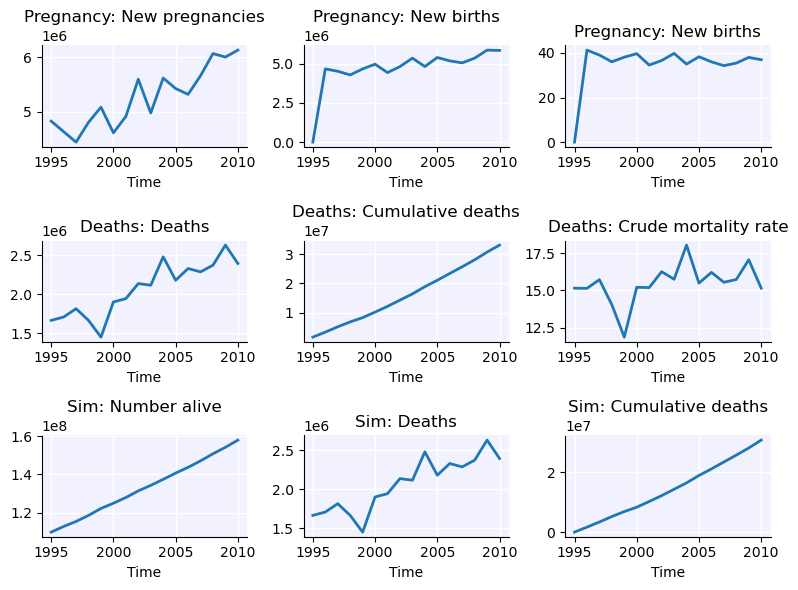

In [9]:
sim = ss.Sim(
    total_pop=106819805,  # Population of Nigeria in 1995
    start=1995,
    dur=15,  # Run for 15 years
    people=ppl,
    demographics=[pregnancy, deaths],
)
sim.run()
sim.plot()